<a href="https://colab.research.google.com/github/smukherjee109/HCV/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
print(sns.__version__)

!pip install biopython
import Bio
print(Bio.__version__)

import scipy
print(scipy.__version__)

0.11.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.0 MB 5.1 MB/s 
1.80
1.7.3


In [ ]:
pip install dna_features_viewer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(<matplotlib.axes._subplots.AxesSubplot at 0x7fb3b024c810>,
 ({GF(5'- UTR, 1-341 (1)): 0,
   GF(Core Protein Region, 342-914 (1)): 0,
   GF(Envelope Protein E1, 915-1490 (1)): 0,
   GF(Envelope Protein E2, 1491-2579 (1)): 0,
   GF(Protein P7, 2580-2768 (1)): 0,
   GF(NS2, 2769-3419 (1)): 0,
   GF(NS3, 3420-5312 (1)): 0,
   GF(cofactor of NS3, 5313-5474 (1)): 0,
   GF(Membrane protein, 5475-6257 (1)): 0,
   GF(NS5A, 6258-7601 (1)): 0,
   GF(NS5B, 7602-9374 (1)): 0,
   GF(3' - UTR, 9378-9646 (1)): 0},
  {GF(Envelope Protein E2, 1491-2579 (1)): {'feature_y': 0,
    'annotation_y': 2.0},
   GF(Membrane protein, 5475-6257 (1)): {'feature_y': 0, 'annotation_y': 1.0},
   GF(Envelope Protein E1, 915-1490 (1)): {'feature_y': 0,
    'annotation_y': 1.0},
   GF(Core Protein Region, 342-914 (1)): {'feature_y': 0, 'annotation_y': 3.0},
   GF(5'- UTR, 1-341 (1)): {'feature_y': 0, 'annotation_y': 2.0},
   GF(3' - UTR, 9378-9646 (1)): {'feature_y': 0, 'annotation_y': 1.0},
   GF(Protein P7, 2580-2768 

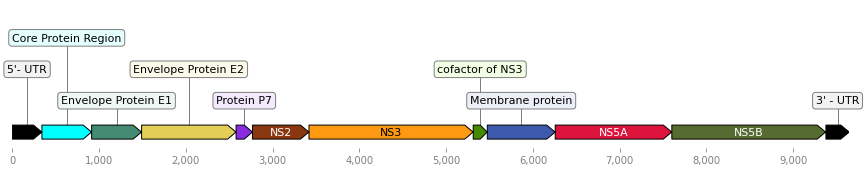

In [ ]:
from dna_features_viewer import GraphicFeature, GraphicRecord
features=[
    GraphicFeature(start=1, end=341, strand=+1, color="#000000",
                   label="5'- UTR"),
    GraphicFeature(start=342, end=914, strand=+1, color="#00FFFF",
                   label="Core Protein Region"),
    GraphicFeature(start=915, end=1490, strand=+1, color="#458B74",
                   label="Envelope Protein E1"),
    GraphicFeature(start=1491, end=2579, strand=+1, color="#E3CF57",
                   label="Envelope Protein E2"),
    GraphicFeature(start=2580, end=2768, strand=+1, color="#8A2BE2",
                   label="Protein P7"),
    GraphicFeature(start=2769, end=3419, strand=+1, color="#8A360F",
                   label="NS2"),
    GraphicFeature(start=3420, end=5312, strand=+1, color="#FF9912",
                   label="NS3"),
    GraphicFeature(start=5313, end=5474, strand=+1, color="#458B00",
                   label="cofactor of NS3"),
    GraphicFeature(start=5475, end=6257, strand=+1, color="#3D59AB",
                   label="Membrane protein"),
    GraphicFeature(start=6258, end=7601, strand=+1, color="#DC143C",
                   label="NS5A"),
    GraphicFeature(start=7602, end=9374, strand=+1, color="#556B2F",
                   label="NS5B"),
    GraphicFeature(start=9378, end=9646, strand=+1, color="#000000",
                   label="3' - UTR")
]
record = GraphicRecord(sequence_length=9646, features=features)
record.plot(figure_width=15)


In [ ]:
!pip install biopython
!pip install matplotlib
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 5.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from Bio import SeqUtils
from Bio import SeqIO
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
seqList = []
def fasta2list(HCV):
    records = SeqIO.parse(HCV , 'fasta')
    
    for record in records:
        desp = record.name
        sequence = str(record.seq)
        date = record.name[-4:]
        t = record.name.split(',')
        subtype = t[1].lower()
        genotype = subtype[0]
        length = len(record.seq)
        #print(length)
        GCc = (SeqUtils.GC(record.seq))
        CpG = record.seq.count('CG')
        
        a = len(SeqUtils.nt_search(str(record.seq),'CNNNNGNCG'))
        a1 = (SeqUtils.nt_search(str(record.seq),'CNNNNGNCG'))
        b = len(SeqUtils.nt_search(str(record.seq),'CNNNNNGNCG'))
        c = len(SeqUtils.nt_search(str(record.seq),'CNNNNNNGNCG'))
        d = len(SeqUtils.nt_search(str(record.seq),'CNNNNNNNNGNCG'))
        zap = a+b+c+d
        OE = (CpG * length) / (record.seq.count('C') * record.seq.count('G'))
        seqList.append([desp, sequence, subtype, genotype, length, GCc, int(date), int(CpG), float(OE), int(zap)])
        print(a1)
   #df = pd.DataFrame(seqList)

fasta2list('/content/drive/MyDrive/HCV2.fasta')
df = pd.DataFrame(seqList)
df.columns = ['name', 'sequence', 'subtype', 'genotype', 'length', 'GC_Content', 'Date', 'CpG', 'O/E', 'ZAP']
conditions = [(df['Date']<=2002), (df['Date']>=2010)]
value = ['before 2002', 'after 2010']
df['time'] = np.select(conditions, value)


'''gt = df.groupby(['subtype'])
st = gt.get_group('1a')
st['avg'] = st.CpG.rolling(50).mean().shift(-20)
st'''

#info = df[0].str.split(',')
#info[0]

Mounted at /content/drive


/usr/local/lib/python3.8/dist-packages/Bio/SeqUtils/__init__.py:144: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  warnings.warn(


['C[GATC][GATC][GATC][GATC]G[GATC]CG', 385, 396, 414, 479, 673, 680, 753, 795, 1083, 1232, 1476, 1551, 1711, 1714, 2280, 2613, 2738, 2790, 3381, 3440, 3763, 4242, 4623, 4932, 5346, 5721, 5808, 5844, 6208, 6560, 7002, 7005, 7368, 7914, 8148, 8431, 8442, 8718, 8778, 8855, 9223, 9592]
['C[GATC][GATC][GATC][GATC]G[GATC]CG', 385, 396, 414, 479, 673, 680, 753, 795, 1083, 1232, 1476, 1551, 1711, 1714, 2280, 2613, 2738, 2790, 3381, 3440, 3763, 4242, 4623, 4932, 5346, 5721, 5808, 5844, 6208, 6560, 7002, 7005, 7368, 7914, 8148, 8431, 8718, 8778, 8855, 9223]
['C[GATC][GATC][GATC][GATC]G[GATC]CG', 385, 396, 414, 479, 673, 680, 753, 795, 1083, 1232, 1476, 1551, 1711, 1714, 2280, 2613, 2738, 2790, 3381, 3440, 3763, 4242, 4623, 4932, 5346, 5721, 5808, 5844, 6208, 6560, 7002, 7005, 7368, 7914, 8148, 8431, 8442, 8718, 8778, 8855, 9223, 9545]
['C[GATC][GATC][GATC][GATC]G[GATC]CG', 385, 396, 414, 479, 673, 680, 753, 795, 1083, 1232, 1476, 1551, 1711, 1714, 2280, 2613, 2738, 2790, 3381, 3440, 3763, 4242, 

"gt = df.groupby(['subtype'])\nst = gt.get_group('1a')\nst['avg'] = st.CpG.rolling(50).mean().shift(-20)\nst"

In [ ]:
drive.mount('/content/drive')
seqList = []
def fasta2list(HCV):
    records = SeqIO.parse(HCV , 'fasta')
    
    for record in records:
        desp = record.name
        t = record.name.split(',')
        accession = t[2]
        date = t[3]
        length = len(record.seq)
        seqList.append([accession, date, length])
fasta2list('/content/drive/MyDrive/HCV2.fasta')
df_s = pd.DataFrame(seqList)
df_s.columns = ['Accession Number', 'Date of Collection', 'Genome Length']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df['sequence']

0       GCCAGCCCCCTGATGGGGGCGACACTCCACCATGAATCACTCCCCT...
1       GCCAGCCCCCTGATGGGGGCGACACTCCACCATGAATCACTCCCCT...
2       GCCAGCCCCCTGATGGGGGCGACACTCCACCATGAATCACTCCCCT...
3       GCCAGCCCCCTGATGGGGGCGACACTCCACCATGAATCACTCCCCT...
4       GCCAGCCCCCTGATGGGGGCGACACTCCACCATGAATCACTCCCCT...
                              ...                        
2704    GTTATCACTTCCCCCCCTGTGAGGAACTTATGTCTTCACGCAGAAA...
2705    GCCAGCCCCTAATGGGGCGACACTCCACCATTGTCACTCCCCTGTG...
2706    AACTACTGTCTTCACGCAGAAAGCGTCTAGCCATGGCGTTAGTATG...
2707    ACCTGCTCTCTATGAGAGCAACACTCCACCATGAACCACTCCCCTG...
2708    GCCAGCCCCCGATTGGGGGCGACACTCCACCATAGATCACTCCCCT...
Name: sequence, Length: 2709, dtype: object

In [ ]:
import regex as re
ref = df.loc[0]
s= SeqUtils.nt_search(str(ref.sequence),'CG')
pos =  [*range(1, 9646)]
y1 = []
length1 = len(pos)
print(pos)
for i in pos:
  if i in s:
    y1.append(1)
  else:
    y1.append(0)
print(y1)



[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [ ]:
#Counting number of CpGs in different regions of the genome
import regex as re
ref = df.loc[0]
s= len(SeqUtils.nt_search(str(ref.sequence[342:915]),'CG'))
print(s)
t= len(SeqUtils.nt_search(str(ref.sequence[915:9646]),'CG'))
print(t)
y = len(SeqUtils.nt_search(str(ref.sequence[0:341]),'CG'))
print(y)

48
530
22


In [ ]:
#Counting number of Zap-binding motifs in different regions of the genome
import regex as re
ref = df.loc[0]
a1 = len(SeqUtils.nt_search(str(ref.sequence[0:341]),'CNNNNGNCG'))
b1 = len(SeqUtils.nt_search(str(ref.sequence[0:341]),'CNNNNNGNCG'))
c1 = len(SeqUtils.nt_search(str(ref.sequence[0:341]),'CNNNNNNGNCG'))
d1 = len(SeqUtils.nt_search(str(ref.sequence[0:341]),'CNNNNNNNNGNCG'))
print(a1+b1+c1+d1)
a2 = len(SeqUtils.nt_search(str(ref.sequence[342:915]),'CNNNNGNCG'))
b2 = len(SeqUtils.nt_search(str(ref.sequence[342:915]),'CNNNNNGNCG'))
c2 = len(SeqUtils.nt_search(str(ref.sequence[342:915]),'CNNNNNNGNCG'))
d2 = len(SeqUtils.nt_search(str(ref.sequence[342:915]),'CNNNNNNNNGNCG'))
print(a2+b2+c2+d2)
a3 = len(SeqUtils.nt_search(str(ref.sequence[915:9646]),'CNNNNGNCG'))
b3 = len(SeqUtils.nt_search(str(ref.sequence[915:9646]),'CNNNNNGNCG'))
c3 = len(SeqUtils.nt_search(str(ref.sequence[915:9646]),'CNNNNNNGNCG'))
d3 = len(SeqUtils.nt_search(str(ref.sequence[915:9646]),'CNNNNNNNNGNCG'))
print(a3+b3+c3+d3)

6
37
185


In [ ]:
Y1 = pd.DataFrame(y1)
Y1.columns = ['CpG']
Y1['Roll'] = Y1.CpG.rolling(500,center = True).mean()
Y1['Roll'] = Y1['Roll'].fillna(0)
Y1

,CpG,Roll
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
9640,0,0.0
9641,0,0.0
9642,0,0.0
9643,0,0.0


In [ ]:
ref = df.loc[0]
s4 = SeqUtils.nt_search(str(ref.sequence),'CNNNNGNCG')
s5 = SeqUtils.nt_search(str(ref.sequence),'CNNNNNGNCG')
s6 = SeqUtils.nt_search(str(ref.sequence),'CNNNNNNGNCG')
s7 = SeqUtils.nt_search(str(ref.sequence),'CNNNNNNNGNCG')
s8 = SeqUtils.nt_search(str(ref.sequence),'CNNNNNNNNGNCG')
pos =  [*range(1, 9646)]
y2 = []
y3 = []
y4 = []
y5 = []
length1 = len(pos)
print(pos)
for i in pos:
  if (i in s4):
    y2.append(1)
    y3.append('C(n4)G(n)CG')
  elif (i in s5):
    y2.append(1)
    y3.append('C(n5)G(n)CG')
  elif (i in s6):
    y2.append(1)
    y3.append('C(n6)G(n)CG')
  elif (i in s7):
    y2.append(1)
    y3.append('C(n7)G(n)CG')
  elif (i in s8):
    y2.append(1)
    y3.append('C(n8)G(n)CG')
  else:
    y2.append(0)
    y3.append("_nolegend_")
print(y2)
print(y3)
for j in pos:
  if (j < 342) :
    y4.append("5' UTR")
    y5.append(1.5)
  elif (j >= 342 and j<=915):
    y4.append("Core Protein")
    y5.append(1.5)
  elif (j > 915 and j<=1490):
    y4.append("E1")
    y5.append(1.5)
  elif (j > 1490 and j<=2579):
    y4.append("E2")
    y5.append(1.5)
  elif (j>2579 and j<=2768):
    y4.append("P7")
    y5.append(1.5)
  elif (j>2768 and j<=3419):
    y4.append("NS2")
    y5.append(1.5)
  elif (j>3419 and j<=5312):
    y4.append("NS3")
    y5.append(1.5)
  elif (j>5312 and j<=5474):
    y4.append("cofactor NS3")
    y5.append(1.5)
  elif (j>5474 and j<=6257):
    y4.append("Membrane protein")
    y5.append(1.5)
  elif (j>6257 and j<=7601):
    y4.append("NS5A")
    y5.append(1.5)
  elif (j>7601 and j<=9374):
    y4.append("NS5B")
    y5.append(1.5)
  elif (j>9374 and j<=9646):
    y4.append("3' UTR")
    y5.append(1.5)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [ ]:
ref = df.loc[0]
s4 = SeqUtils.nt_search(str(ref.sequence),'CNNNNGNCG')
s5 = SeqUtils.nt_search(str(ref.sequence),'CNNNNNGNCG')
s6 = SeqUtils.nt_search(str(ref.sequence),'CNNNNNNGNCG')
s7 = SeqUtils.nt_search(str(ref.sequence),'CNNNNNNNGNCG')
s8 = SeqUtils.nt_search(str(ref.sequence),'CNNNNNNNNGNCG')
print(s4)
print(s5)
print(s6)
print(s7)
print(s8)

['C[GATC][GATC][GATC][GATC]G[GATC]CG', 385, 396, 414, 479, 673, 680, 753, 795, 1083, 1232, 1476, 1551, 1711, 1714, 2280, 2613, 2738, 2790, 3381, 3440, 3763, 4242, 4623, 4932, 5346, 5721, 5808, 5844, 6208, 6560, 7002, 7005, 7368, 7914, 8148, 8431, 8442, 8718, 8778, 8855, 9223, 9592]
['C[GATC][GATC][GATC][GATC][GATC]G[GATC]CG', 246, 384, 395, 413, 445, 499, 613, 752, 755, 770, 812, 1130, 1221, 1231, 1234, 1469, 1710, 1897, 2272, 2516, 2737, 2948, 3380, 3424, 3439, 3587, 3762, 4238, 4639, 4718, 4794, 5245, 5297, 5324, 5407, 5617, 5795, 5807, 6014, 6139, 6398, 6847, 7004, 7198, 7538, 7867, 8123, 8147, 8502, 8588, 8720, 9222, 9591]
['C[GATC][GATC][GATC][GATC][GATC][GATC]G[GATC]CG', 394, 412, 498, 515, 724, 982, 1081, 1109, 1477, 1774, 1896, 1900, 2425, 2939, 3423, 3438, 3479, 3586, 3761, 4237, 4353, 4543, 4573, 4597, 4630, 4669, 4930, 5218, 5280, 5284, 5296, 5326, 5406, 5794, 5806, 5824, 5839, 5910, 6013, 6154, 6206, 6804, 6832, 6846, 6885, 7000, 7003, 7197, 7417, 7474, 7551, 7615, 7936, 80

In [ ]:
Y2 = pd.DataFrame({'ZAP' : y2, 'Motif_Type': y3})
Y2

,ZAP,Motif_Type
0,0,_nolegend_
1,0,_nolegend_
2,0,_nolegend_
3,0,_nolegend_
4,0,_nolegend_
...,...,...
9640,0,_nolegend_
9641,0,_nolegend_
9642,0,_nolegend_
9643,0,_nolegend_


In [ ]:
Y3 = pd.DataFrame({'gen_pos' : y5, 'gen_type': y4})
Y3

,gen_pos,gen_type
0,1.5,5' UTR
1,1.5,5' UTR
2,1.5,5' UTR
3,1.5,5' UTR
4,1.5,5' UTR
...,...,...
9640,1.5,3' UTR
9641,1.5,3' UTR
9642,1.5,3' UTR
9643,1.5,3' UTR


In [ ]:
ref_seq = SeqIO.read('/content/drive/MyDrive/ref_seq.gb', 'genbank')
features = ref_seq.features
features_genes = []

for feature in features:
  if feature.type == 'gene':
    features_genes.append(feature)
print(features_genes)
for feature in features_genes:
  print(feature.qualifiers['gene'])

[SeqFeature(FeatureLocation(ExactPosition(341), ExactPosition(9377), strand=1), type='gene')]
['POLY']


In [ ]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


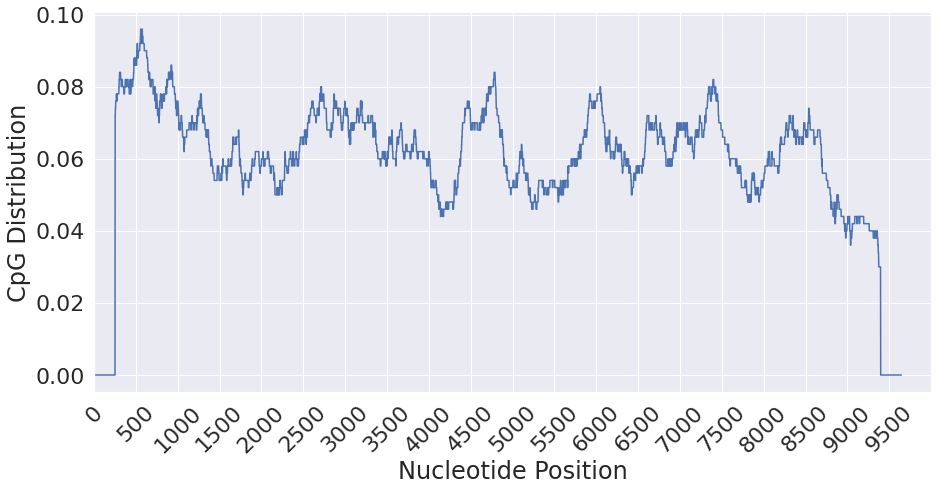

In [ ]:
x = pos
y = Y1['Roll'] 
sns.set(font_scale=2)
sns.set_style("darkgrid")
 
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 7))
 
# drawing the plot
sns.lineplot(x , y).set(xlabel = 'Nucleotide Position', ylabel = 'CpG Distribution', xlim = (0,10000))
plt.xticks(np.arange(0, 10000, 500))
plt.xticks(rotation = 45)
plt.savefig('CpG distribution.pdf', dpi = 1000)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


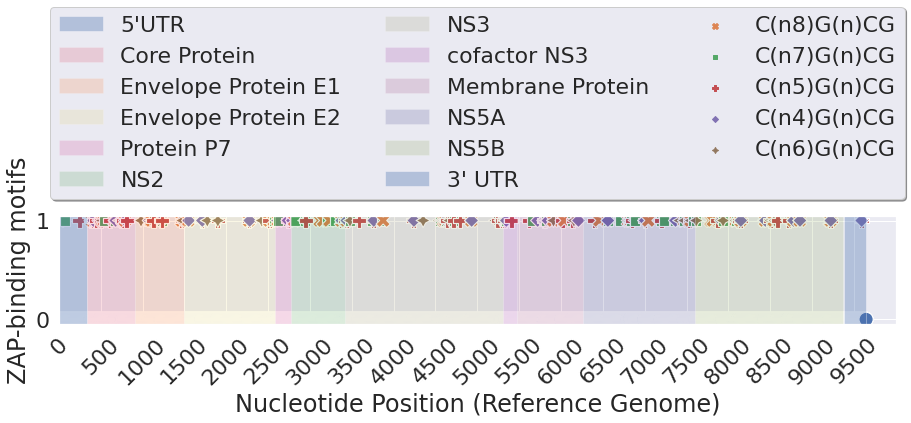

In [ ]:
x = pos
y = Y2['ZAP'] 
sns.set(font_scale=2)
sns.set_style("darkgrid")
 
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 2))
 
# drawing the plot
sns.scatterplot(x , y, style = Y2['Motif_Type'], hue = Y2['Motif_Type'], s = 200).set(xlabel = 'Nucleotide Position (Reference Genome)', ylabel = 'ZAP-binding motifs', xlim = (0,10000))
plt.axvspan(xmin = 1, xmax= 341, facecolor = 'b', alpha = 0.35, label = "5'UTR")
plt.axvspan(xmin = 341, xmax= 915, facecolor = '#DC143C', alpha = 0.15, label = "Core Protein")
plt.axvspan(xmin = 915, xmax= 1490, facecolor = '#FF6103', alpha = 0.15, label = "Envelope Protein E1")
plt.axvspan(xmin = 1490, xmax= 2579, facecolor = '#E3CF57', alpha = 0.15, label = "Envelope Protein E2")
plt.axvspan(xmin = 2579, xmax= 2768, facecolor = '#CD1076', alpha = 0.15, label = "Protein P7")
plt.axvspan(xmin = 2768, xmax= 3419, facecolor = '#228B22', alpha = 0.15, label = "NS2")
plt.axvspan(xmin = 3419, xmax= 5312, facecolor = '#8B864E', alpha = 0.15, label = "NS3")
plt.axvspan(xmin = 5312, xmax= 5474, facecolor = '#8B008B', alpha = 0.15, label = "cofactor NS3")
plt.axvspan(xmin = 5474, xmax= 6257, facecolor = '#8B1C62', alpha = 0.15, label = "Membrane Protein")
plt.axvspan(xmin = 6257, xmax= 7601, facecolor = '#191970', alpha = 0.15, label = "NS5A")
plt.axvspan(xmin = 7601, xmax= 9374, facecolor = '#6B8E23', alpha = 0.15, label = "NS5B")
plt.axvspan(xmin = 9378, xmax= 9646, facecolor = 'b', alpha = 0.35, label = "3' UTR")
plt.xticks(np.arange(0, 10000, 500))
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.xticks(rotation = 45)
plt.savefig('ZAP distribution', bbox_inches = 'tight', dpi = 1000)
plt.show()

In [ ]:
#Plot for CpG loss from Core
x = ['Core Protein Region', 'Rest']
y = [27.90698, 6.654344]

sns.set(font_scale=2)
sns.set_style("darkgrid")
 
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(5, 5))
 
# drawing the plot
sns.barplot(x , y)
plt.legend()
plt.show()

NameError: ignored

In [ ]:
df['subtype'].value_counts()

_        1069
1a        861
1b        408
3a         90
1          42
2b         38
6          34
2a         18
4a         12
2          11
6xg        11
6xj         8
5a          7
2b/1a       6
4           6
2c          6
4d          5
4v          5
6xi         4
8           4
6a          4
4q          4
4k          4
1g          4
2j          4
3b          3
2i          3
1b/2k       3
1l          3
6n          3
3           2
1b/2b       2
2f          2
2l          2
2k/1b       2
1c          2
2q          2
4r          2
4f          2
1/2b        1
4n          1
6l          1
1e          1
2k          1
7           1
4s          1
8a          1
3i          1
5           1
6v          1
Name: subtype, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


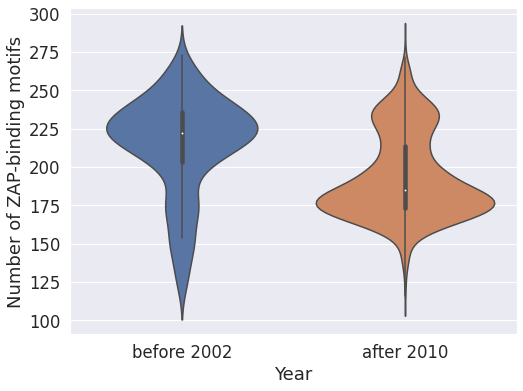

In [ ]:
#overall loss in ZAP binding motif before 2002 and after 2010
filt = df['time'] != '0'
a = df[filt]
x = a["time"]
y = a["ZAP"]
sns.set_style("darkgrid")
# setting the dimensions of the plot
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize=(8, 6))
 
# drawing the plot
sns.violinplot(x , y).set(xlabel = 'Year', ylabel = 'Number of ZAP-binding motifs')
plt.savefig('ZAP_violin.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


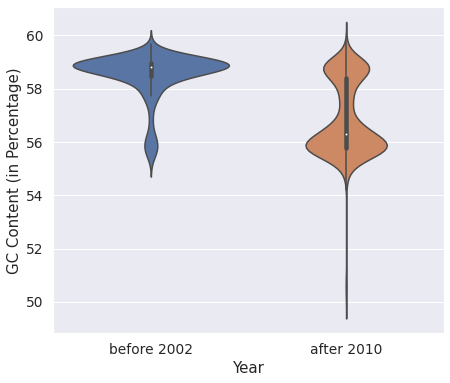

In [ ]:
#overall loss in GC Content before 2002 and after 2010
filt = df['time'] != '0'
a = df[filt]
x = a["time"]
y = a["GC_Content"]
sns.set_style("darkgrid")
# setting the dimensions of the plot
sns.set(font_scale = 1.25)
fig, ax = plt.subplots(figsize=(7, 6))
 
# drawing the plot
sns.violinplot(x , y).set(xlabel = 'Year', ylabel = 'GC Content (in Percentage)')
plt.savefig('GC_Overall_violin.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


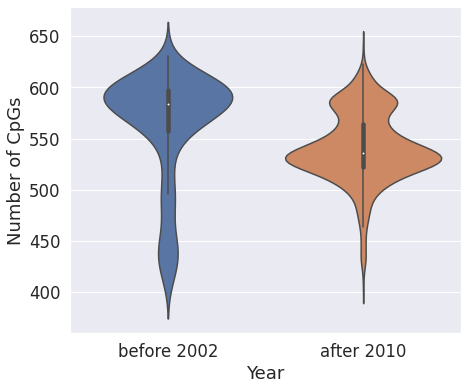

In [ ]:
#overall loss in CpG Content before 2002 and after 2010
filt = df['time'] != '0'
a = df[filt]
x = a["time"]
y = a["CpG"]
sns.set_style("darkgrid")
# setting the dimensions of the plot
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize=(7, 6))
 
# drawing the plot
sns.violinplot(x , y).set(xlabel = 'Year', ylabel = 'Number of CpGs')
plt.savefig('CpG_Overall_violin.png')
plt.show()

In [ ]:
filt1 = df['time'] == 'before 2002'
a = df[filt1]
y = a['ZAP']
print(y.median())
filt2 = df['time'] == 'after 2010'
b = df[filt2]
z = b['ZAP']
print(z.median())
CpGLoss = y.median() - z.median()
print(CpGLoss)


222.0
185.0
37.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


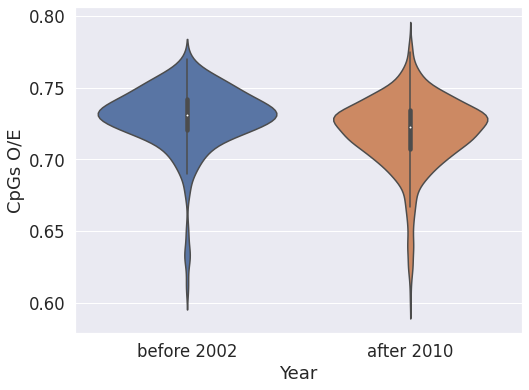

In [ ]:
#overall loss in CpG O/E Content before 2002 and after 2010
filt = df['time'] != '0'
a = df[filt]
x = a["time"]
y = a["O/E"]
sns.set_style("darkgrid")
# setting the dimensions of the plot
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize=(8, 6))
 
# drawing the plot
sns.violinplot(x , y).set(xlabel = 'Year', ylabel = 'CpGs O/E')
plt.savefig('OE_Overall_violin.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


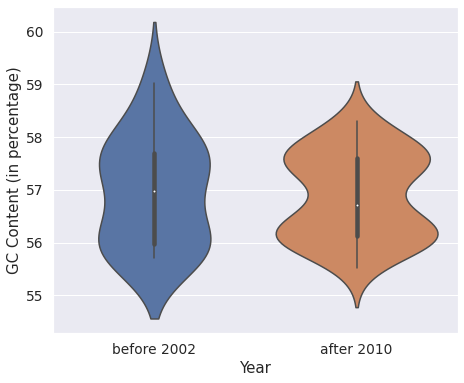

In [ ]:
filt = df['time'] != '0' 
filt2 = df['genotype'] == '2'
a = df[filt]
b = a[filt2]
x = b["time"]
y1 = b["GC_Content"]
sns.set(font_scale = 1.25)
sns.set_style("darkgrid")
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(7.25, 6))
 
# drawing the plot
sns.violinplot(x , y1).set(xlabel = 'Year', ylabel = 'GC Content (in percentage)')
plt.savefig('GC2_violin.png')
plt.show()

In [ ]:
from reportlab.lib import colors
from reportlab.lib.units import cm
from Bio.Graphics import GenomeDiagram
from Bio import SeqIO
record = SeqIO.read("/content/drive/MyDrive/ref_seq.gb", "genbank")
gd_diagram = GenomeDiagram.Diagram("Yersinia pestis biovar Microtus plasmid pPCP1")
gd_track_for_features = gd_diagram.new_track(1, name="Annotated Features")
gd_feature_set = gd_track_for_features.new_set()
for feature in record.features:
    if feature.type != "gene":
        # Exclude this feature
        continue
    if len(gd_feature_set) % 2 == 0:
        color = colors.blue
    else:
        color = colors.lightblue
    gd_feature_set.add_feature(feature, color=color, label=True)
gd_diagram.draw(
    format="linear",
    orientation="landscape",
    pagesize="A4",
    fragments=4,
    start=0,
    end=len(record),
)
gd_diagram.write("plasmid_linear.pdf", "PDF")

In [ ]:
!pip install reportlab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.8 MB 35.5 MB/s 
     |████████████████████████████████| 3.1 MB 52.5 MB/s 
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


In [ ]:

filt1 = df['time'] == 'before 2002' 
filt2 = df['time'] == 'after 2010'
a = df[filt1]
b = df[filt2]
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(a['ZAP'], b['ZAP'])
print((stat, p_value))

(379324.5, 8.670382265746609e-34)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


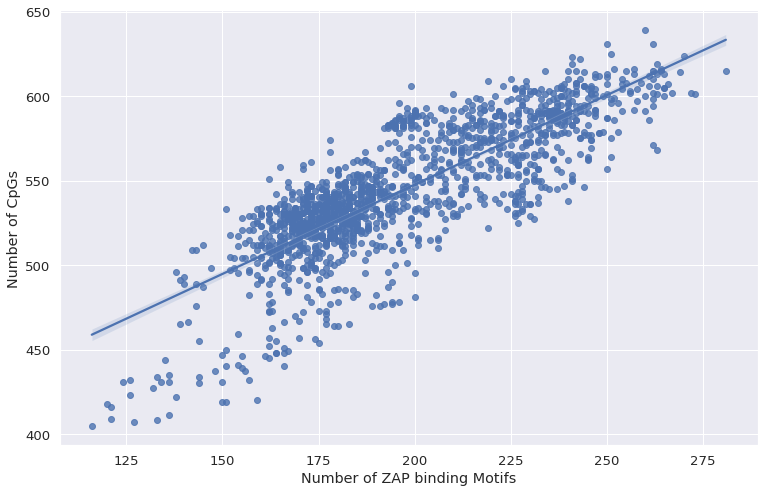

In [ ]:
filt=(a['Date']<=2018) & (a['Date']>=2001)
new_a=a.loc[filt]
x = new_a["ZAP"]
y = new_a["CpG"]
sns.set(font_scale=1.2)
sns.set_style("darkgrid")
 
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(12.5, 8))
 
# drawing the plot
sns.regplot(x , y).set(xlabel = 'Number of ZAP binding Motifs', ylabel = 'Number of CpGs')
plt.savefig('CpGvZAP.png')
plt.show()

In [ ]:
filt=(a['Date']<=2018) & (a['Date']>=2001)
new_a=a.loc[filt]
from scipy import stats
stats.pearsonr(new_a['ZAP'], new_a['CpG'])

(0.818310484725907, 0.0)

In [ ]:
df

,name,sequence,subtype,genotype,length,GC_Content,Date,CpG,O/E,ZAP,time
0,"H77,1a,NC_004102,1977","(G, C, C, A, G, C, C, C, C, C, T, G, A, T, G, ...",1a,1,9861,56.961769,1977,597,0.747033,220,before 2002
1,"HCV-H,1a,M67463,1977","(G, C, C, A, G, C, C, C, C, C, T, G, A, T, G, ...",1a,1,9861,56.160633,1977,590,0.759515,217,before 2002
2,"H77-H21,1a,AF011753,1977","(G, C, C, A, G, C, C, C, C, C, T, G, A, T, G, ...",1a,1,9861,56.911064,1977,598,0.749644,223,before 2002
3,"H77-H11,1a,AF011752,1977","(G, C, C, A, G, C, C, C, C, C, T, G, A, T, G, ...",1a,1,9861,56.911064,1977,598,0.749694,224,before 2002
4,"H77C,1a,AF011751,1977","(G, C, C, A, G, C, C, C, C, C, T, G, A, T, G, ...",1a,1,9861,56.890782,1977,596,0.747638,222,before 2002
...,...,...,...,...,...,...,...,...,...,...,...
2704,"YNKH304,6xi,MZ504975,2019","(G, T, T, A, T, C, A, C, T, T, C, C, C, C, C, ...",6xi,6,9861,52.814116,2019,530,0.771122,175,after 2010
2705,"GZ2983,_,MT185686,2019","(G, C, C, A, G, C, C, C, C, T, A, A, T, G, G, ...",_,_,9861,53.949904,2019,528,0.736114,186,after 2010
2706,"MXK20820,1,ON676559,2020","(A, A, C, T, A, C, T, G, T, C, T, T, C, A, C, ...",1,1,9861,55.389920,2020,596,0.788672,247,after 2010
2707,"ED43,4,MW531222,2021","(A, C, C, T, G, C, T, C, T, C, T, A, T, G, A, ...",4,4,9861,54.649630,2021,558,0.758571,182,after 2010


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


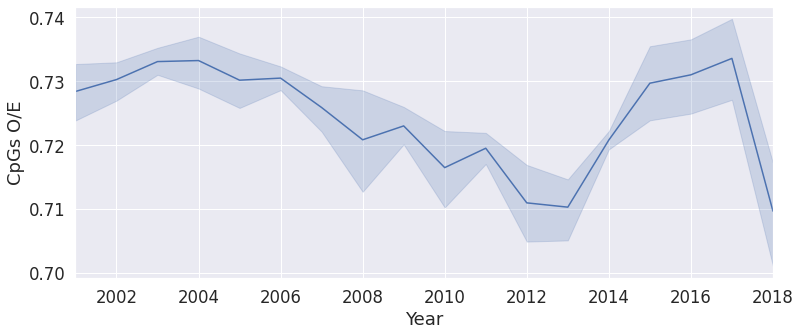

In [ ]:
filt=(df['Date']<=2018) & (df['Date']>=2001)
new_b=df.loc[filt]
x = new_b["Date"]
y = new_b["O/E"]
sns.set(font_scale = 1.5)
sns.set_style("darkgrid")
 
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(12.5, 5))
 
# drawing the plot
sns.lineplot(x , y).set(xlabel = 'Year', ylabel = 'CpGs O/E', xlim = (2001,2018))
plt.savefig('CpGOE.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


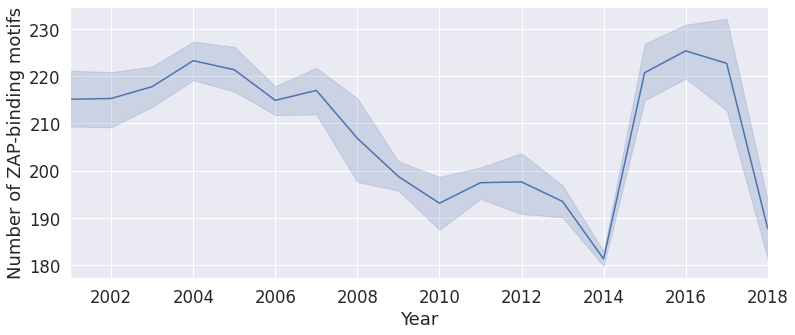

In [ ]:
filt=(df['Date']<=2018) & (df['Date']>=2001)
new_b=df.loc[filt]
x = new_b["Date"]
y = new_b["ZAP"]
sns.set(font_scale = 1.5)
sns.set_style("darkgrid")
 
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(12.5, 5))
 
# drawing the plot
sns.lineplot(x , y).set(xlabel = 'Year', ylabel = 'Number of ZAP-binding motifs', xlim = (2001,2018))
plt.savefig('ZAP_Line_overall.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


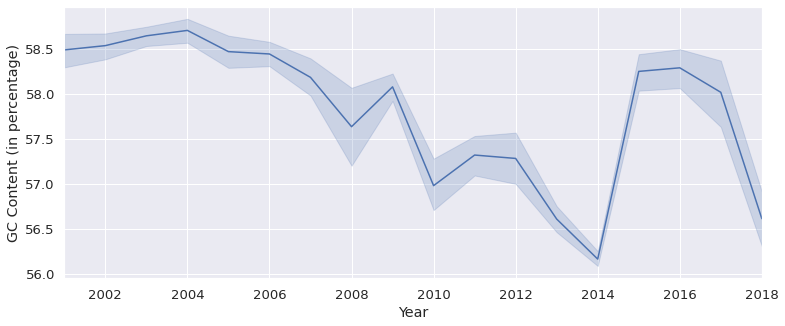

In [ ]:
filt=(df['Date']<=2018) & (df['Date']>=2001)
new_b=df.loc[filt]
x = new_b["Date"]
y = new_b["GC_Content"]
sns.set(font_scale = 1.2)
sns.set_style("darkgrid")
 
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(12.5, 5))
 
# drawing the plot
sns.lineplot(x , y).set(xlabel = 'Year', ylabel = 'GC Content (in percentage)', xlim = (2001,2018))
plt.savefig('GC_overall.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


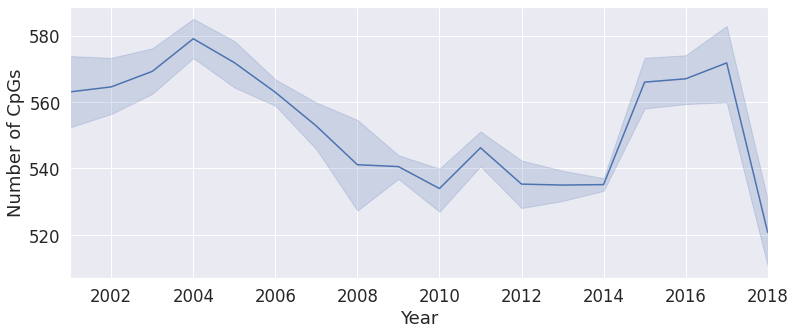

In [ ]:
filt=(df['Date']<=2018) & (df['Date']>=2001)
new_b=df.loc[filt]
x = new_b["Date"]
y = new_b["CpG"]
sns.set(font_scale = 1.5)
sns.set_style("darkgrid")
 
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(12.5, 5))
 
# drawing the plot
sns.lineplot(x , y).set(xlabel = 'Year', ylabel = 'Number of CpGs', xlim = (2001,2018))
plt.savefig('CpG_overall.png')
plt.show()

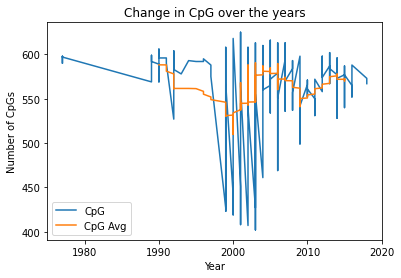

In [ ]:

plt.plot(st['Date'], st['CpG'], label = "CpG")
plt.plot(st['Date'], st['avg'], label = "CpG Avg")
plt.legend()
plt.xlabel('Year')
plt.ylabel('Number of CpGs')
plt.title('Change in CpG over the years')
plt.savefig('plot.png')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


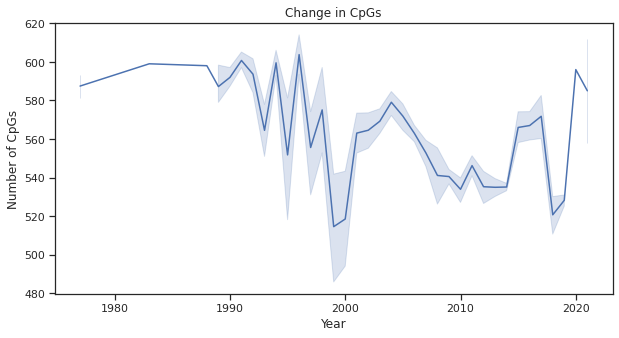

In [ ]:
x = df["Date"]
y = df["CpG"]
sns.set_style("ticks")
 
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10, 5))
 
# drawing the plot
sns.lineplot(x , y).set(title = 'Change in CpGs', xlabel = 'Year', ylabel = 'Number of CpGs')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


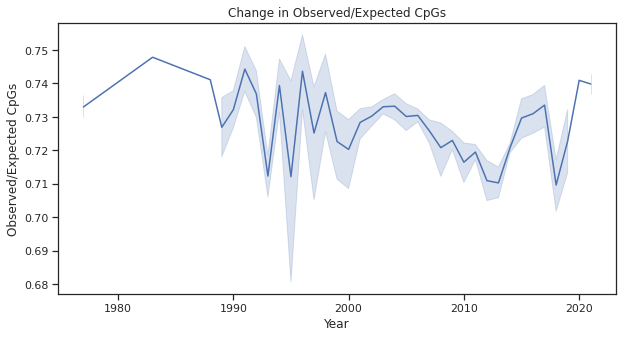

In [ ]:
x = df["Date"]
y = df["O/E"]
sns.set_style("ticks")
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10, 5))
 
# drawing the plot
sns.lineplot(x , y).set(title = 'Change in Observed/Expected CpGs', xlabel = 'Year', ylabel = 'Observed/Expected CpGs')
plt.show()

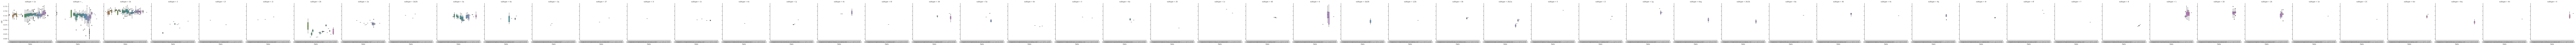

In [ ]:
sns.catplot(data=df, kind="box", x="Date", y="O/E", row = "subtype")

In [ ]:
filt= df['Date'] <= 2000
fh = df.loc[filt]['CpG'].mean() 
lh = df.loc[~filt]['CpG'].mean()
fm = df.loc[filt]['CpG'].median()
lm =  df.loc[~filt]['CpG'].median()
print(fh)
print(lh)
print(fm)
print(lm)

561.2280701754386
550.2391646966115
586.0
552.0


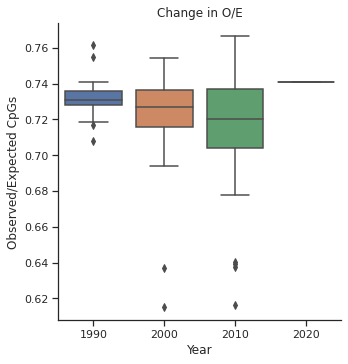

In [ ]:
ct = df[df.Date.isin([1980, 1990, 2000, 2010, 2020])]
sns.catplot(data=ct, kind="box", x="Date", y="O/E").set(xlabel ="Year", ylabel = "Observed/Expected CpGs", title = "Change in O/E") 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


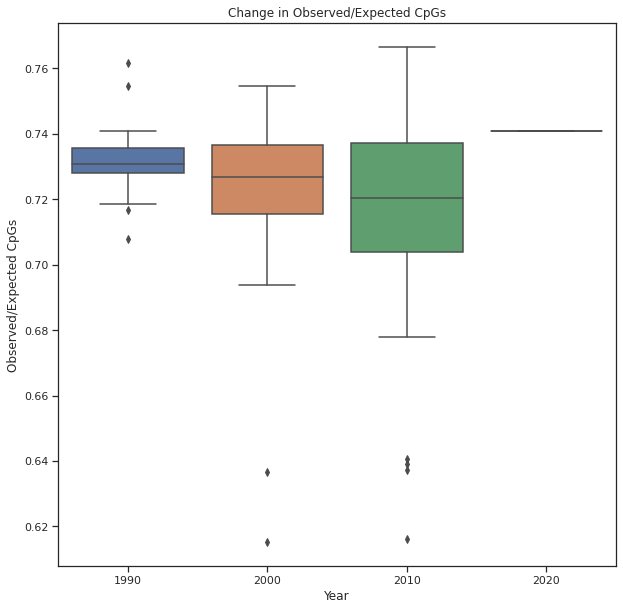

In [ ]:
x = ct["Date"]
y = ct["O/E"]
sns.set_style("ticks")
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10, 10))
 
# drawing the plot
sns.boxplot(x , y).set(title = 'Change in Observed/Expected CpGs', xlabel = 'Year', ylabel = 'Observed/Expected CpGs')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


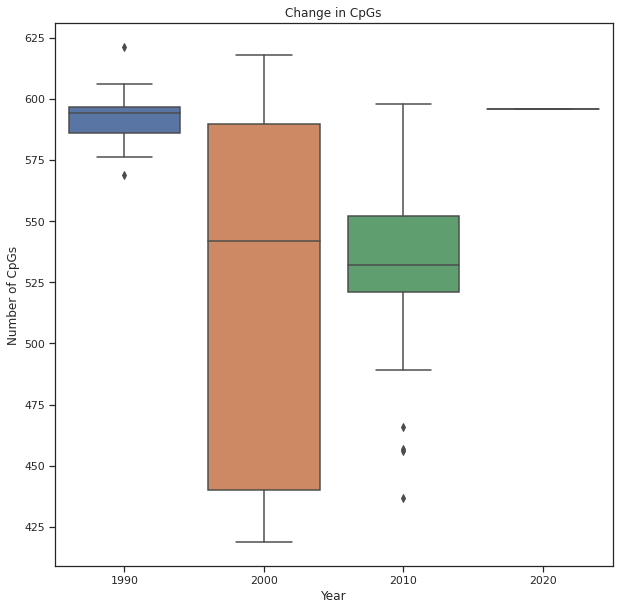

In [ ]:
x = ct["Date"]
y = ct["CpG"]
sns.set_style("ticks")
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10, 10))
 
# drawing the plot
sns.boxplot(x , y).set(title = 'Change in CpGs', xlabel = 'Year', ylabel = 'Number of CpGs')
plt.show()

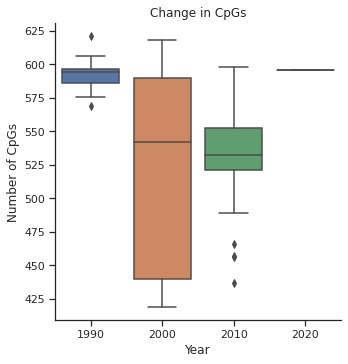

In [ ]:
ct = df[df.Date.isin([1980, 1990, 2000, 2010, 2020])]
sns.catplot(data=ct, kind="box", x="Date", y= "CpG").set(xlabel ="Year", ylabel = "Number of CpGs", title = "Change in CpGs") 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


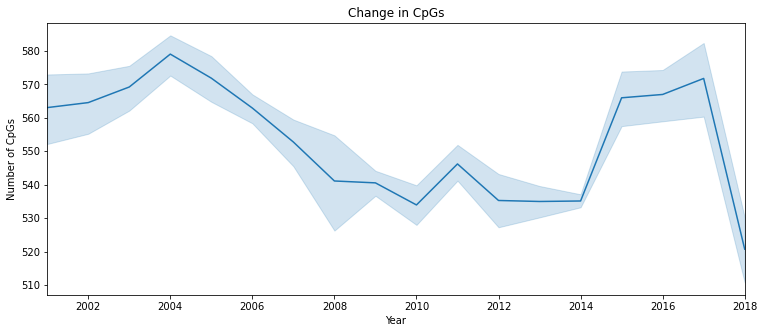

In [ ]:
filt=(df['Date']<=2018) & (df['Date']>=2001)
new_df=df.loc[filt]
x = new_df["Date"]
y = new_df["CpG"]
sns.set_style("ticks")
 
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(12.5, 5))
 
# drawing the plot
sns.lineplot(x , y).set(title = 'Change in CpGs', xlabel = 'Year', ylabel = 'Number of CpGs', xlim = (2001,2018))
plt.savefig('CpG.png')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


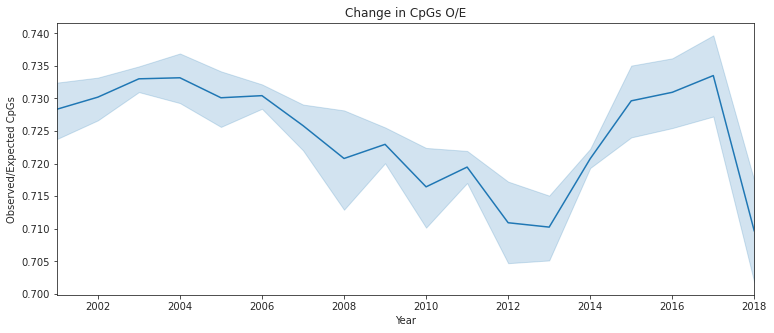

In [ ]:
filt=(df['Date']<=2018) & (df['Date']>=2001)
new_df=df.loc[filt]
x = new_df["Date"]
y = new_df["O/E"]
sns.set_style("ticks")
 
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(12.5, 5))
 
# drawing the plot
sns.lineplot(x , y).set(title = 'Change in CpGs O/E', xlabel = 'Year', ylabel = 'Observed/Expected CpGs', xlim = (2001,2018))
plt.savefig('CpGOE.png')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


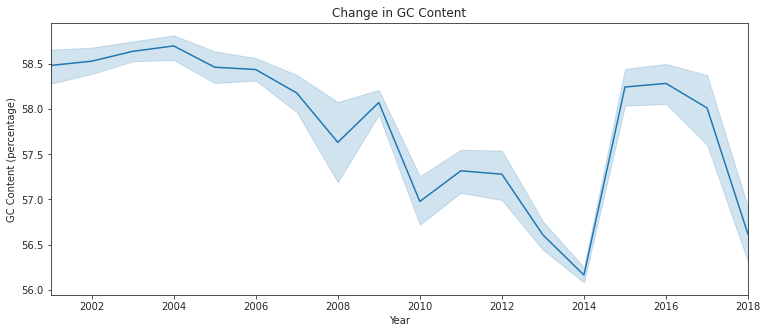

In [ ]:
filt=(df['Date']<=2018) & (df['Date']>=2001)
new_df=df.loc[filt]
x = new_df["Date"]
y = new_df["GC_Content"]
sns.set_style("ticks")
 
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(12.5, 5))
 
# drawing the plot
sns.lineplot(x , y).set(title = 'Change in GC Content', xlabel = 'Year', ylabel = 'GC Content (percentage)', xlim = (2001,2018))
plt.savefig('GCContent.png')
plt.show()


In [ ]:
from Bio import AlignIO
from Bio import SeqIO

alignments= AlignIO.parse('/content/drive/MyDrive/align.aln' , 'clustal' )
AlignIO.write(alignments, 'HCV_align.fasta', 'fasta')
for alignment in alignments:
  print(alignment)

In [ ]:
from Bio import AlignIO
from Bio import SeqIO

alignments= AlignIO.parse('/content/drive/MyDrive/align.aln' , 'clustal' )
for alignment in alignments:
  print(alignment[0].seq)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------gcc-------------------------------------------------------------------------------------agcc----------------------------------------------c-----------cctga-------------------------------------------------------t----------------------------------------------gg--g------------------------------------------------------g----------------g--------------------------------------c---------------------gaca---------ctc-------cac------------catg---------------aatc------------------act----c-------ccctgtgaggaactact---------------------------------g------tcttc--ac----------------------------------------------------------------------------------------------------------------------------------------------gcagaaagcgt-ctagccatggcgtt-a-g-tatgagt----------g-t--c-gtgcagcctcc----------a-

In [ ]:
from Bio import SeqUtils
from Bio import SeqIO
from matplotlib import pyplot as plt
import re
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
seqList = []
def fasta2list(HCV):
    records = SeqIO.parse(HCV , 'fasta')
    
    for record in records:
        desp = record.name
        sequence = str(record.seq)
        date = record.name[-4:]
        t = record.name.split(',')
        #subtype = t[1].lower()
        #genotype = subtype[0]
        length = len(record.seq)
        #print(length)
        GCc = (SeqUtils.GC(record.seq))
        CpG = record.seq.count('CG')
        a = len(SeqUtils.nt_search(str(record.seq).upper(),'CNNNNGNCG'))
        b = len(SeqUtils.nt_search(str(record.seq),'CNNNNNGNCG'))
        c = len(SeqUtils.nt_search(str(record.seq),'CNNNNNNGNCG'))
        d = len(SeqUtils.nt_search(str(record.seq),'CNNNNNNNNGNCG'))
        zap = a+b+c+d
        a1=re.search('cg', str(record.seq))
        #OE = (CpG * length) / (record.seq.count('C') * record.seq.count('G'))
        seqList.append([desp, sequence, length, GCc, date, CpG, zap])
        print(a1)
   #df = pd.DataFrame(seqList)

fasta2list('/content/drive/MyDrive/HCV_align.fasta')
al_df = pd.DataFrame(seqList)
al_df.columns = ['name', 'sequence', 'length', 'GC_Content', 'Date', 'CpG', 'ZAP']



ModuleNotFoundError: ignored

In [ ]:
al_df['sequence'][0]
a1 = SeqUtils.nt_search(al_df['sequence'][0].upper(),'CNNNNGNCG')
print(a1)


['C[GATC][GATC][GATC][GATC]G[GATC]CG', 1390, 1722, 1729, 1802, 1845, 2662, 3051, 3054, 3857, 4193, 4364, 5157, 5318, 5646, 6127, 6510, 6823, 7278, 7674, 8010, 8046, 8423, 8802, 9288, 9291, 9776, 11110, 11504, 11671, 12090, 13148]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


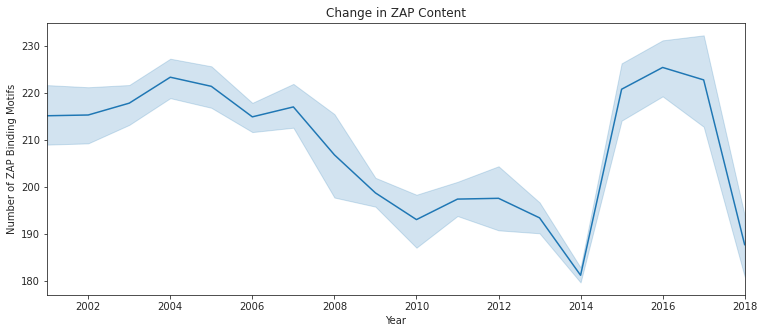

In [ ]:
filt=(df['Date']<=2018) & (df['Date']>=2001)
new_df=df.loc[filt]
x = new_df["Date"]
y = new_df["ZAP"]
sns.set_style("ticks")
 
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(12.5, 5))
 
# drawing the plot
sns.lineplot(x , y).set(title = 'Change in ZAP Content', xlabel = 'Year', ylabel = 'Number of ZAP Binding Motifs', xlim = (2001,2018))
plt.savefig('ZAP.png')
plt.show()

In [ ]:
x = pos
y = 
sns.set_style("ticks")
 
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(12.5, 5))
 
# drawing the plot
sns.lineplot(x , y).set(title = 'Change in CpGs O/E', xlabel = 'Year', ylabel = 'Observed/Expected CpGs', xlim = (2001,2018))
plt.savefig('CpGOE.png')
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 54 kB 3.4 MB/s 
  Created wheel for geneview: filename=geneview-0.1.3-py3-none-any.whl size=54237 sha256=cae431c2b020a2d292feba14193c1fe30c70b16e1eddcd000326f6c2eb7ee2ad
  Stored in directory: /root/.cache/pip/wheels/47/9a/fa/976772997ad0db81e6c25ba65a1d08fc128e9b6520363351d5
Successfully built geneview
